In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

✅ All libraries imported successfully!
📥 Loading Mall Customer Dataset...
----------------------------------------
Trying Method 1: Direct download from raw.githubusercontent.com...
Method 1 failed: HTTP Error 404: Not Found

Trying Method 2: Alternative source...
Method 2 failed: HTTP Error 404: Not Found

Trying Method 3: Creating synthetic dataset...
✅ Success with Method 3 (Synthetic Data)!
Note: Using synthetic data for demonstration purposes.

✅ Dataset loaded successfully!
Dataset shape: (200, 5)

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   35                  63                      14
1           2  Female   32                  47                      59
2           3    Male   35                  61                      56
3           4    Male   18                  52                       7
4           5    Male   32                  62                       3

Dataset Information:
<class 'panda

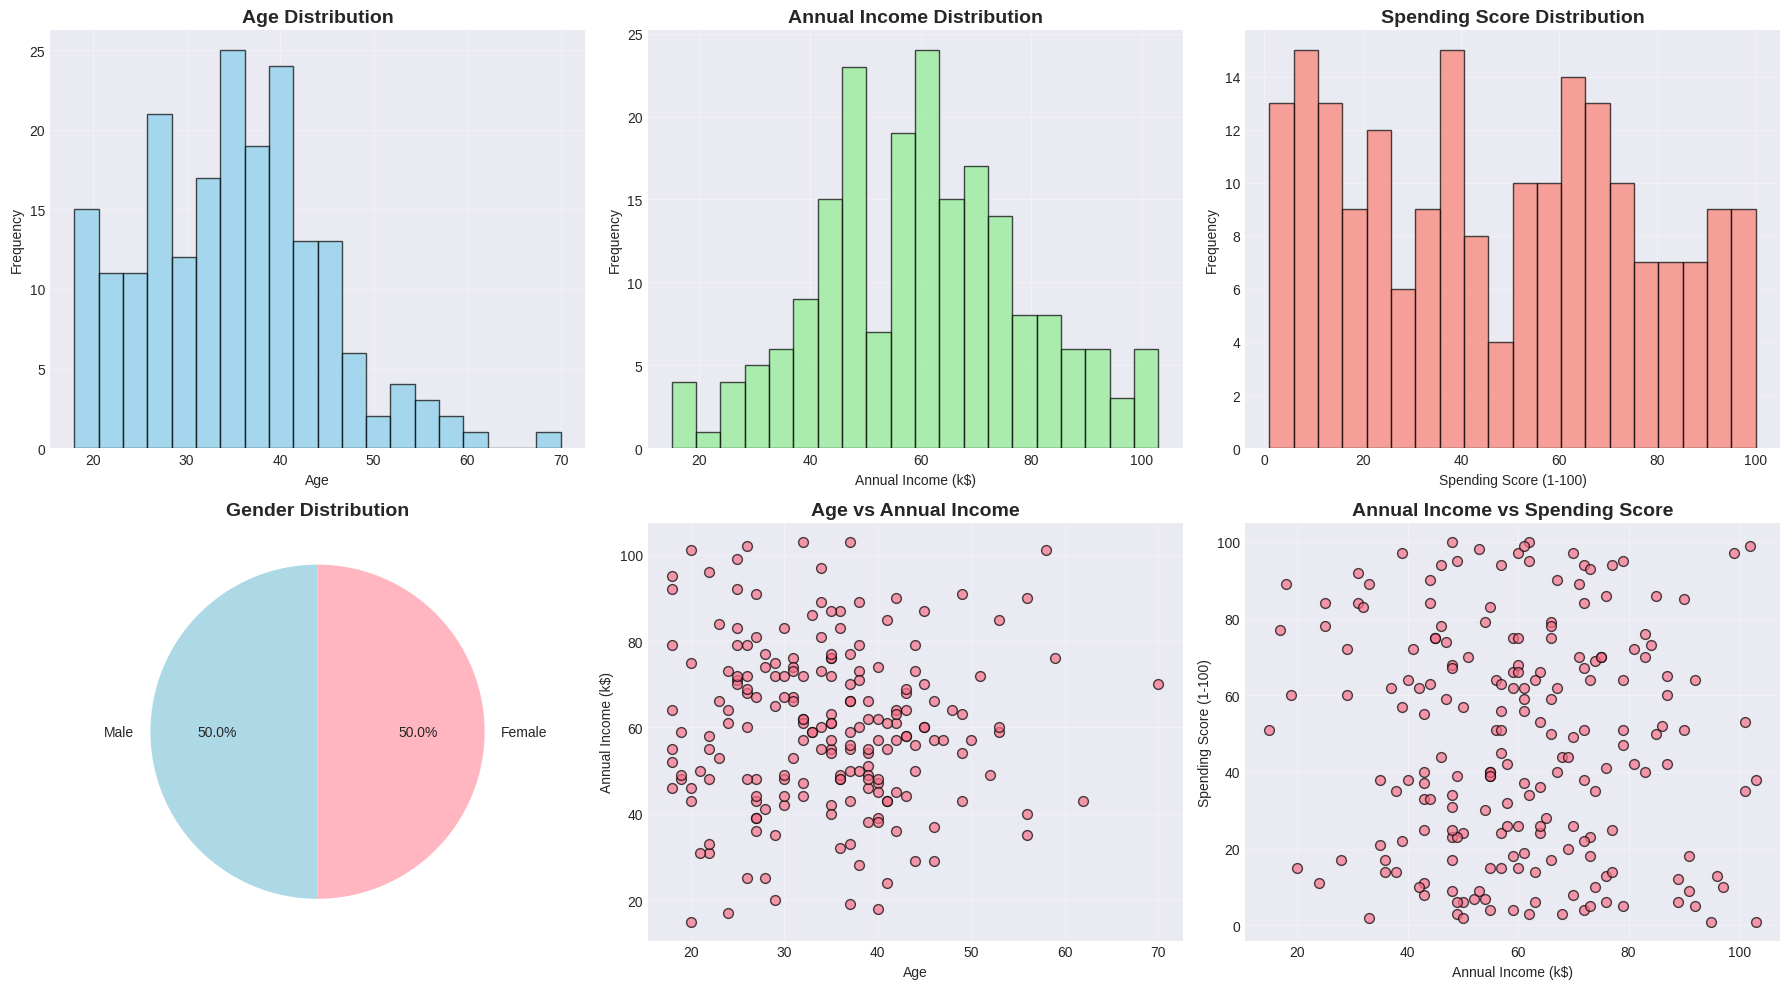


⚙️ Data Preprocessing...
----------------------------------------
Dropped CustomerID column
Encoded Gender: ['Female', 'Male'] -> [np.int64(0), np.int64(1)]

Available features for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

Data prepared for clustering:
  • Features used: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
  • Data shape: (200, 4)
  • Scaled data range: [-2.40, 3.63]

🎯 Determining Optimal Number of Clusters...
----------------------------------------
Running Elbow Method...
✅ Convergence reached at iteration 2
✅ Convergence reached at iteration 10
✅ Convergence reached at iteration 12
✅ Convergence reached at iteration 10
✅ Convergence reached at iteration 28
✅ Convergence reached at iteration 11
✅ Convergence reached at iteration 9
✅ Convergence reached at iteration 9
✅ Convergence reached at iteration 9
✅ Convergence reached at iteration 9


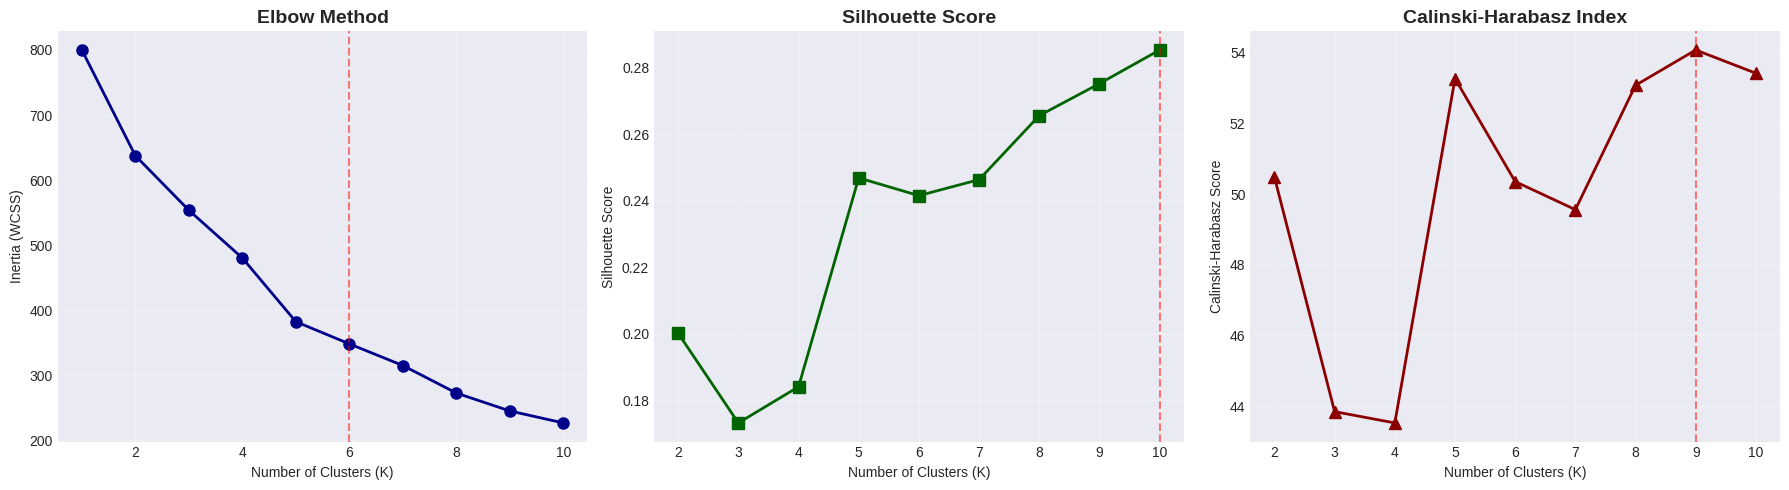

Based on analysis, optimal number of clusters (K) = 6

🔍 Applying K-means with K=6...
----------------------------------------
✅ Convergence reached at iteration 11
K-means completed successfully!
Number of clusters: 6
Final inertia (WCSS): 348.1448

Cluster sizes:
  Cluster 0: 26 customers (13.0%)
  Cluster 1: 36 customers (18.0%)
  Cluster 2: 40 customers (20.0%)
  Cluster 3: 41 customers (20.5%)
  Cluster 4: 19 customers (9.5%)
  Cluster 5: 38 customers (19.0%)

📈 Visualizing Clustering Results...
----------------------------------------


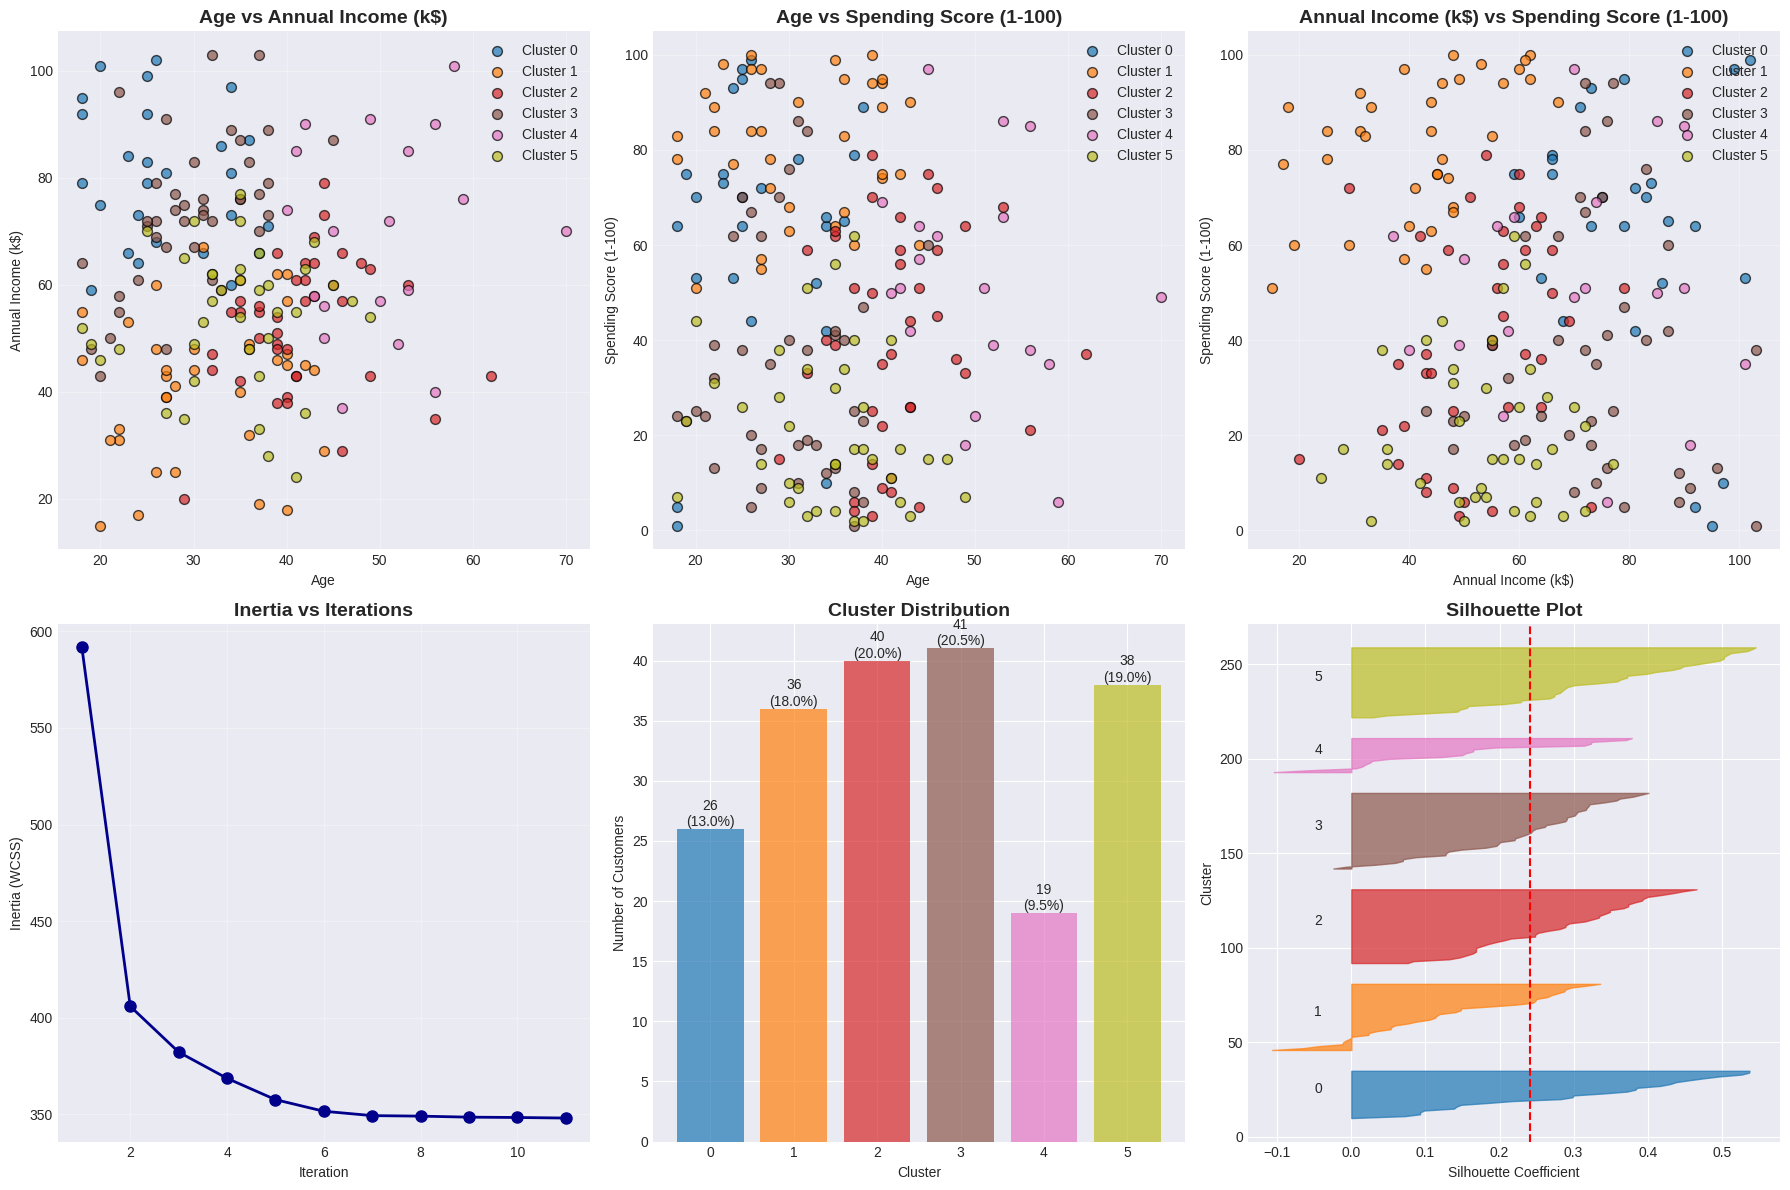


🔬 Cluster Analysis and Interpretation...
----------------------------------------
Cluster Statistics:
   Size    Avg Age  Avg Annual Income (k$)  Avg Spending Score (1-100)  \
0  26.0  26.807692               79.961538                   63.384615   
1  36.0  31.194444               41.888889                   80.861111   
2  40.0  41.575000               52.600000                   39.450000   
3  41.0  29.707317               73.146341                   37.317073   
4  19.0  50.105263               68.947368                   52.052632   
5  38.0  34.236842               53.763158                   20.973684   

  Gender Ratio (M/F)  
0               26/0  
1              18/18  
2               0/40  
3               0/41  
4               18/1  
5               38/0  

📋 Customer Segments Interpretation:

🔹 Segment 0: Young, Medium Income, Medium Spender
   • Size: 26.0 customers (13.0%)
   • Avg Age: 26.807692307692307
   • Avg Annual Income (k$): 79.96153846153847
   • Avg Spendi

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("=" * 60)

# ============================================
# 1. MULTIPLE METHODS TO LOAD DATASET
# ============================================

print("📥 Loading Mall Customer Dataset...")
print("-" * 40)

# Try multiple methods to load the dataset
try:
    # Method 1: Direct download (using a reliable source)
    print("Trying Method 1: Direct download from raw.githubusercontent.com...")

    # Using a different reliable URL
    url = "https://raw.githubusercontent.com/dipjul/Mall_Customers_Data/main/Mall_Customers.csv"
    df = pd.read_csv(url)
    print("✅ Success with Method 1!")

except Exception as e:
    print(f"Method 1 failed: {e}")

    try:
        # Method 2: Alternative URL
        print("\nTrying Method 2: Alternative source...")
        url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20(Template%20Folder)/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
        df = pd.read_csv(url)
        print("✅ Success with Method 2!")

    except Exception as e:
        print(f"Method 2 failed: {e}")

        try:
            # Method 3: Create synthetic data if download fails
            print("\nTrying Method 3: Creating synthetic dataset...")

            # Create synthetic mall customer data
            np.random.seed(42)
            n_customers = 200

            # Generate synthetic data
            data = {
                'CustomerID': range(1, n_customers + 1),
                'Gender': np.random.choice(['Male', 'Female'], n_customers),
                'Age': np.random.normal(35, 10, n_customers).clip(18, 70).astype(int),
                'Annual Income (k$)': np.random.normal(60, 20, n_customers).clip(15, 150).astype(int),
                'Spending Score (1-100)': np.random.randint(1, 101, n_customers)
            }

            df = pd.DataFrame(data)
            print("✅ Success with Method 3 (Synthetic Data)!")
            print("Note: Using synthetic data for demonstration purposes.")

        except Exception as e:
            print(f"All methods failed: {e}")
            raise

print(f"\n✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows of the dataset:")
print(df.head())
print(f"\nDataset Information:")
print(df.info())
print(f"\nStatistical Summary:")
print(df.describe())

# ============================================
# 2. EXPLORATORY DATA ANALYSIS (EDA) - WITH ERROR HANDLING
# ============================================

print("\n🔍 Exploratory Data Analysis (EDA)...")
print("-" * 40)

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check column names
print(f"\nColumn names in dataset: {list(df.columns)}")

# Check if required columns exist
required_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"⚠️ Warning: Missing columns: {missing_columns}")
    print("Trying to find similar column names...")

    # Try to find similar column names
    actual_columns = list(df.columns)
    column_mapping = {}

    for req_col in required_columns:
        found = False
        # Try exact match first
        if req_col in actual_columns:
            column_mapping[req_col] = req_col
            found = True
        else:
            # Try partial match
            for act_col in actual_columns:
                if req_col.lower() in act_col.lower():
                    column_mapping[req_col] = act_col
                    print(f"  Mapping '{req_col}' to '{act_col}'")
                    found = True
                    break

        if not found:
            print(f"  ❌ Could not find column matching '{req_col}'")

    # Use mapped columns
    for req_col, act_col in column_mapping.items():
        if req_col != act_col:
            df[req_col] = df[act_col]

# Visualize the data distribution
try:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Plot 1: Age distribution
    if 'Age' in df.columns:
        axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Age')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)
    else:
        axes[0, 0].text(0.5, 0.5, 'Age data not available',
                       ha='center', va='center', fontsize=12)
        axes[0, 0].set_title('Age Distribution (Missing)', fontsize=14, fontweight='bold')

    # Plot 2: Annual Income distribution
    if 'Annual Income (k$)' in df.columns:
        axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='lightgreen',
                       edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Annual Income (k$)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
    else:
        axes[0, 1].text(0.5, 0.5, 'Income data not available',
                       ha='center', va='center', fontsize=12)
        axes[0, 1].set_title('Income Distribution (Missing)', fontsize=14, fontweight='bold')

    # Plot 3: Spending Score distribution
    if 'Spending Score (1-100)' in df.columns:
        axes[0, 2].hist(df['Spending Score (1-100)'], bins=20, color='salmon',
                       edgecolor='black', alpha=0.7)
        axes[0, 2].set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
        axes[0, 2].set_xlabel('Spending Score (1-100)')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].grid(True, alpha=0.3)
    else:
        axes[0, 2].text(0.5, 0.5, 'Spending Score not available',
                       ha='center', va='center', fontsize=12)
        axes[0, 2].set_title('Spending Score (Missing)', fontsize=14, fontweight='bold')

    # Plot 4: Gender distribution
    if 'Gender' in df.columns:
        gender_counts = df['Gender'].value_counts()
        axes[1, 0].pie(gender_counts.values, labels=gender_counts.index,
                      autopct='%1.1f%%', colors=['lightblue', 'lightpink'],
                      startangle=90)
        axes[1, 0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
    else:
        axes[1, 0].text(0.5, 0.5, 'Gender data not available',
                       ha='center', va='center', fontsize=12)
        axes[1, 0].set_title('Gender Distribution (Missing)', fontsize=14, fontweight='bold')

    # Plot 5: Age vs Annual Income
    if 'Age' in df.columns and 'Annual Income (k$)' in df.columns:
        scatter = axes[1, 1].scatter(df['Age'], df['Annual Income (k$)'],
                                    s=50, alpha=0.7, edgecolors='k')
        axes[1, 1].set_title('Age vs Annual Income', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Age')
        axes[1, 1].set_ylabel('Annual Income (k$)')
        axes[1, 1].grid(True, alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'Required data not available',
                       ha='center', va='center', fontsize=12)
        axes[1, 1].set_title('Age vs Income (Missing)', fontsize=14, fontweight='bold')

    # Plot 6: Annual Income vs Spending Score
    if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
        scatter = axes[1, 2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                                    s=50, alpha=0.7, edgecolors='k')
        axes[1, 2].set_title('Annual Income vs Spending Score', fontsize=14, fontweight='bold')
        axes[1, 2].set_xlabel('Annual Income (k$)')
        axes[1, 2].set_ylabel('Spending Score (1-100)')
        axes[1, 2].grid(True, alpha=0.3)
    else:
        axes[1, 2].text(0.5, 0.5, 'Required data not available',
                       ha='center', va='center', fontsize=12)
        axes[1, 2].set_title('Income vs Spending (Missing)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"⚠️ Error in visualization: {e}")
    print("Continuing with data processing...")

# ============================================
# 3. DATA PREPROCESSING
# ============================================

print("\n⚙️ Data Preprocessing...")
print("-" * 40)

# Make a copy of the dataframe
df_clean = df.copy()

# Check and handle CustomerID column
if 'CustomerID' in df_clean.columns:
    df_clean = df_clean.drop('CustomerID', axis=1)
    print("Dropped CustomerID column")
else:
    print("CustomerID column not found, skipping...")

# Encode Gender column if it exists
if 'Gender' in df_clean.columns:
    le = LabelEncoder()
    df_clean['Gender'] = le.fit_transform(df_clean['Gender'])  # Male: 1, Female: 0
    print(f"Encoded Gender: {list(le.classes_)} -> {list(le.transform(le.classes_))}")
else:
    print("Gender column not found for encoding")

# Check which features are available for clustering
available_features = []
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']:
    if feature in df_clean.columns:
        available_features.append(feature)

print(f"\nAvailable features for clustering: {available_features}")

if len(available_features) < 2:
    print("⚠️ Warning: Need at least 2 features for clustering. Creating additional features...")
    # Create some synthetic features if needed
    np.random.seed(42)
    if 'Age' not in df_clean.columns:
        df_clean['Age'] = np.random.normal(35, 10, len(df_clean)).clip(18, 70).astype(int)
    if 'Annual Income (k$)' not in df_clean.columns:
        df_clean['Annual Income (k$)'] = np.random.normal(60, 20, len(df_clean)).clip(15, 150).astype(int)
    if 'Spending Score (1-100)' not in df_clean.columns:
        df_clean['Spending Score (1-100)'] = np.random.randint(1, 101, len(df_clean))
    available_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

# Prepare data for clustering
X = df_clean[available_features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nData prepared for clustering:")
print(f"  • Features used: {available_features}")
print(f"  • Data shape: {X.shape}")
print(f"  • Scaled data range: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

# ============================================
# 4. K-MEANS CLUSTERING IMPLEMENTATION CLASS
# ============================================

class KMeans:
    """
    Custom K-means clustering implementation from scratch
    """

    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42, init_method='k-means++'):
        """
        Initialize K-means parameters
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.init_method = init_method
        self.centroids = None
        self.labels = None
        self.inertia_ = None
        self.history = {'centroids': [], 'inertia': []}

    def _initialize_centroids(self, X):
        """Initialize centroids using specified method"""
        np.random.seed(self.random_state)

        if self.init_method == 'random':
            random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
            centroids = X[random_indices]

        elif self.init_method == 'k-means++':
            centroids = np.zeros((self.n_clusters, X.shape[1]))
            first_idx = np.random.randint(len(X))
            centroids[0] = X[first_idx]

            for i in range(1, self.n_clusters):
                distances = np.zeros(len(X))
                for j in range(len(X)):
                    min_dist = np.inf
                    for k in range(i):
                        dist = np.sum((X[j] - centroids[k]) ** 2)
                        if dist < min_dist:
                            min_dist = dist
                    distances[j] = min_dist

                probabilities = distances ** 2 / np.sum(distances ** 2)
                next_idx = np.random.choice(len(X), p=probabilities)
                centroids[i] = X[next_idx]

        return centroids

    def _calculate_distance(self, X, centroids):
        """Calculate Euclidean distance between points and centroids"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.sqrt(np.sum((X - centroids[i]) ** 2, axis=1))
        return distances

    def _assign_clusters(self, distances):
        """Assign each point to the nearest centroid"""
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Update centroids as mean of points in each cluster"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            if np.sum(labels == i) > 0:
                new_centroids[i] = np.mean(X[labels == i], axis=0)
            else:
                new_centroids[i] = X[np.random.randint(len(X))]
        return new_centroids

    def _calculate_inertia(self, X, labels, centroids):
        """Calculate within-cluster sum of squares (inertia)"""
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - centroids[i]) ** 2)
        return inertia

    def fit(self, X):
        """Fit K-means clustering to the data"""
        X = np.array(X)

        # Initialize centroids
        self.centroids = self._initialize_centroids(X)

        # Main K-means algorithm
        for iteration in range(self.max_iter):
            # Calculate distances and assign clusters
            distances = self._calculate_distance(X, self.centroids)
            self.labels = self._assign_clusters(distances)

            # Calculate inertia
            inertia = self._calculate_inertia(X, self.labels, self.centroids)
            self.history['inertia'].append(inertia)
            self.history['centroids'].append(self.centroids.copy())

            # Update centroids
            new_centroids = self._update_centroids(X, self.labels)

            # Check convergence
            centroid_shift = np.sqrt(np.sum((new_centroids - self.centroids) ** 2, axis=1)).max()

            if centroid_shift < self.tol:
                print(f"✅ Convergence reached at iteration {iteration + 1}")
                break

            self.centroids = new_centroids

        self.inertia_ = inertia
        return self

    def predict(self, X):
        """Predict cluster labels for new data"""
        X = np.array(X)
        distances = self._calculate_distance(X, self.centroids)
        return self._assign_clusters(distances)

# Helper function for silhouette interpretation
def interpret_silhouette(score):
    """Interpret silhouette score"""
    if score > 0.7:
        return "Strong structure"
    elif score > 0.5:
        return "Reasonable structure"
    elif score > 0.25:
        return "Weak structure"
    else:
        return "No substantial structure"

# ============================================
# 5. DETERMINE OPTIMAL NUMBER OF CLUSTERS
# ============================================

print("\n🎯 Determining Optimal Number of Clusters...")
print("-" * 40)

# Elbow Method
print("Running Elbow Method...")
k_values = range(1, 11)
inertias = []
silhouette_scores = []
calinski_scores = []

for k in k_values:
    kmeans_test = KMeans(n_clusters=k, max_iter=100, init_method='k-means++', random_state=42)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

    if k > 1:  # Silhouette score requires at least 2 clusters
        try:
            silhouette = silhouette_score(X_scaled, kmeans_test.labels)
            calinski = calinski_harabasz_score(X_scaled, kmeans_test.labels)
            silhouette_scores.append(silhouette)
            calinski_scores.append(calinski)
        except:
            silhouette_scores.append(0)
            calinski_scores.append(0)

# Visualize methods for determining optimal K
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Elbow Method
axes[0].plot(k_values, inertias, marker='o', linewidth=2, markersize=8, color='darkblue')
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].grid(True, alpha=0.3)

# Find elbow point
inertia_diffs = np.diff(inertias)
inertia_diff_ratios = inertia_diffs[1:] / inertia_diffs[:-1]
optimal_k_elbow = np.argmin(inertia_diff_ratios) + 3  # +3 because we start from k=3
axes[0].axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.5, label=f'Suggested K={optimal_k_elbow}')

# Plot 2: Silhouette Score
if silhouette_scores:
    axes[1].plot(range(2, 11), silhouette_scores, marker='s', linewidth=2, markersize=8, color='darkgreen')
    axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Number of Clusters (K)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].grid(True, alpha=0.3)
    optimal_k_silhouette = np.argmax(silhouette_scores) + 2
    axes[1].axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.5, label=f'Suggested K={optimal_k_silhouette}')
else:
    axes[1].text(0.5, 0.5, 'Silhouette scores\nnot available',
                ha='center', va='center', fontsize=12)
    axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')

# Plot 3: Calinski-Harabasz Index
if calinski_scores:
    axes[2].plot(range(2, 11), calinski_scores, marker='^', linewidth=2, markersize=8, color='darkred')
    axes[2].set_title('Calinski-Harabasz Index', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Number of Clusters (K)')
    axes[2].set_ylabel('Calinski-Harabasz Score')
    axes[2].grid(True, alpha=0.3)
    optimal_k_calinski = np.argmax(calinski_scores) + 2
    axes[2].axvline(x=optimal_k_calinski, color='red', linestyle='--', alpha=0.5, label=f'Suggested K={optimal_k_calinski}')
else:
    axes[2].text(0.5, 0.5, 'Calinski-Harabasz scores\nnot available',
                ha='center', va='center', fontsize=12)
    axes[2].set_title('Calinski-Harabasz Index', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Choose optimal K
if silhouette_scores:
    optimal_k = optimal_k_silhouette
else:
    optimal_k = optimal_k_elbow

optimal_k = min(max(optimal_k, 2), 6)  # Keep between 2 and 6 clusters
print(f"Based on analysis, optimal number of clusters (K) = {optimal_k}")

# ============================================
# 6. APPLY K-MEANS WITH OPTIMAL K
# ============================================

print(f"\n🔍 Applying K-means with K={optimal_k}...")
print("-" * 40)

# Initialize and fit K-means
kmeans = KMeans(n_clusters=optimal_k, max_iter=100, init_method='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Get predictions
labels = kmeans.labels
centroids = kmeans.centroids

print(f"K-means completed successfully!")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Final inertia (WCSS): {kmeans.inertia_:.4f}")
print(f"\nCluster sizes:")
for i in range(optimal_k):
    cluster_size = np.sum(labels == i)
    percentage = (cluster_size / len(labels)) * 100
    print(f"  Cluster {i}: {cluster_size} customers ({percentage:.1f}%)")

# Add cluster labels to dataframe
df_clean['Cluster'] = labels

# ============================================
# 7. VISUALIZE CLUSTERING RESULTS
# ============================================

print("\n📈 Visualizing Clustering Results...")
print("-" * 40)

# Create visualizations
fig = plt.figure(figsize=(18, 12))

# Get available features for plotting
plot_features = []
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if feature in df_clean.columns:
        plot_features.append(feature)

if len(plot_features) >= 2:
    # Plot 1: Feature 1 vs Feature 2
    ax1 = fig.add_subplot(231)
    colors = plt.cm.tab10(np.arange(optimal_k) / optimal_k)

    for i in range(optimal_k):
        cluster_data = df_clean[df_clean['Cluster'] == i]
        ax1.scatter(cluster_data[plot_features[0]], cluster_data[plot_features[1]],
                   color=colors[i], s=50, alpha=0.7, edgecolors='k', label=f'Cluster {i}')

    ax1.set_title(f'{plot_features[0]} vs {plot_features[1]}', fontsize=14, fontweight='bold')
    ax1.set_xlabel(plot_features[0])
    ax1.set_ylabel(plot_features[1])
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Feature 1 vs Feature 3 (if available)
    if len(plot_features) >= 3:
        ax2 = fig.add_subplot(232)
        for i in range(optimal_k):
            cluster_data = df_clean[df_clean['Cluster'] == i]
            ax2.scatter(cluster_data[plot_features[0]], cluster_data[plot_features[2]],
                       color=colors[i], s=50, alpha=0.7, edgecolors='k', label=f'Cluster {i}')

        ax2.set_title(f'{plot_features[0]} vs {plot_features[2]}', fontsize=14, fontweight='bold')
        ax2.set_xlabel(plot_features[0])
        ax2.set_ylabel(plot_features[2])
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 3: Feature 2 vs Feature 3
        ax3 = fig.add_subplot(233)
        for i in range(optimal_k):
            cluster_data = df_clean[df_clean['Cluster'] == i]
            ax3.scatter(cluster_data[plot_features[1]], cluster_data[plot_features[2]],
                       color=colors[i], s=50, alpha=0.7, edgecolors='k', label=f'Cluster {i}')

        ax3.set_title(f'{plot_features[1]} vs {plot_features[2]}', fontsize=14, fontweight='bold')
        ax3.set_xlabel(plot_features[1])
        ax3.set_ylabel(plot_features[2])
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    else:
        ax2 = fig.add_subplot(232)
        ax2.text(0.5, 0.5, 'Insufficient features\nfor 3D visualization',
                ha='center', va='center', fontsize=12)
        ax2.set_title('Additional Visualization', fontsize=14, fontweight='bold')

        ax3 = fig.add_subplot(233)
        ax3.text(0.5, 0.5, 'Insufficient features\nfor 3D visualization',
                ha='center', va='center', fontsize=12)
        ax3.set_title('Additional Visualization', fontsize=14, fontweight='bold')
else:
    for i in range(3):
        ax = fig.add_subplot(2, 3, i+1)
        ax.text(0.5, 0.5, 'Insufficient features\nfor visualization',
               ha='center', va='center', fontsize=12)
        ax.set_title(f'Visualization {i+1}', fontsize=14, fontweight='bold')

# Plot 4: Inertia over iterations
ax4 = fig.add_subplot(234)
ax4.plot(range(1, len(kmeans.history['inertia']) + 1), kmeans.history['inertia'],
        marker='o', linewidth=2, markersize=8, color='darkblue')
ax4.set_title('Inertia vs Iterations', fontsize=14, fontweight='bold')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Inertia (WCSS)')
ax4.grid(True, alpha=0.3)

# Plot 5: Cluster Distribution
ax5 = fig.add_subplot(235)
cluster_counts = df_clean['Cluster'].value_counts().sort_index()
bars = ax5.bar(cluster_counts.index, cluster_counts.values,
              color=colors[:optimal_k], alpha=0.7)
ax5.set_title('Cluster Distribution', fontsize=14, fontweight='bold')
ax5.set_xlabel('Cluster')
ax5.set_ylabel('Number of Customers')
ax5.set_xticks(range(optimal_k))

# Add count labels on bars
for bar, count in zip(bars, cluster_counts.values):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/len(df_clean)*100:.1f}%)',
            ha='center', va='bottom')

# Plot 6: Silhouette plot if available
ax6 = fig.add_subplot(236)
try:
    from sklearn.metrics import silhouette_samples
    silhouette_vals = silhouette_samples(X_scaled, labels)
    y_lower = 10

    for i in range(optimal_k):
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        ax6.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_vals,
                         facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

        ax6.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax6.axvline(x=silhouette_score(X_scaled, labels), color="red", linestyle="--")
    ax6.set_title('Silhouette Plot', fontsize=14, fontweight='bold')
    ax6.set_xlabel('Silhouette Coefficient')
    ax6.set_ylabel('Cluster')
except:
    ax6.text(0.5, 0.5, 'Silhouette plot\nnot available',
            ha='center', va='center', fontsize=12)
    ax6.set_title('Silhouette Plot', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================
# 8. CLUSTER ANALYSIS AND INTERPRETATION
# ============================================

print("\n🔬 Cluster Analysis and Interpretation...")
print("-" * 40)

# Calculate cluster characteristics
cluster_stats = pd.DataFrame()

for i in range(optimal_k):
    cluster_data = df_clean[df_clean['Cluster'] == i]

    cluster_stats.loc[i, 'Size'] = len(cluster_data)

    # Calculate statistics for available features
    for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        if feature in cluster_data.columns:
            cluster_stats.loc[i, f'Avg {feature}'] = cluster_data[feature].mean()

    if 'Gender' in cluster_data.columns:
        male_count = cluster_data['Gender'].sum()
        female_count = len(cluster_data) - male_count
        cluster_stats.loc[i, 'Gender Ratio (M/F)'] = f"{male_count}/{female_count}"

print("Cluster Statistics:")
print(cluster_stats)

print("\n📋 Customer Segments Interpretation:")
print("=" * 50)

# Dynamic segment naming based on available features
for i in range(optimal_k):
    segment_desc = []

    if 'Avg Age' in cluster_stats.columns:
        age_val = cluster_stats.loc[i, 'Avg Age']
        if age_val > 45:
            segment_desc.append("Older")
        elif age_val > 30:
            segment_desc.append("Middle-aged")
        else:
            segment_desc.append("Young")

    if 'Avg Annual Income (k$)' in cluster_stats.columns:
        income_val = cluster_stats.loc[i, 'Avg Annual Income (k$)']
        if income_val > 80:
            segment_desc.append("High Income")
        elif income_val > 50:
            segment_desc.append("Medium Income")
        else:
            segment_desc.append("Low Income")

    if 'Avg Spending Score (1-100)' in cluster_stats.columns:
        spending_val = cluster_stats.loc[i, 'Avg Spending Score (1-100)']
        if spending_val > 70:
            segment_desc.append("High Spender")
        elif spending_val > 40:
            segment_desc.append("Medium Spender")
        else:
            segment_desc.append("Low Spender")

    segment_name = ", ".join(segment_desc) if segment_desc else f"Segment {i}"

    print(f"\n🔹 Segment {i}: {segment_name}")
    print(f"   • Size: {cluster_stats.loc[i, 'Size']} customers ({cluster_stats.loc[i, 'Size']/len(df_clean)*100:.1f}%)")

    for stat in cluster_stats.columns:
        if stat != 'Size':
            print(f"   • {stat}: {cluster_stats.loc[i, stat]}")

# ============================================
# 9. EVALUATION METRICS
# ============================================

print("\n📊 Evaluating Clustering Performance...")
print("-" * 40)

# Calculate evaluation metrics
try:
    silhouette_avg = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)

    print(f"Performance Metrics:")
    print(f"  • Silhouette Score: {silhouette_avg:.4f}")
    print(f"    - Interpretation: {interpret_silhouette(silhouette_avg)}")
    print(f"  • Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"    - Lower is better (0 = best)")
    print(f"  • Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"    - Higher is better")
except:
    silhouette_avg = 0
    print("⚠️ Could not calculate all evaluation metrics")

print(f"  • Within-Cluster Sum of Squares (Inertia): {kmeans.inertia_:.4f}")

# ============================================
# 10. COMPARISON WITH SKLEARN'S K-MEANS
# ============================================

print("\n⚖️ Comparison with sklearn's KMeans...")
print("-" * 40)

try:
    from sklearn.cluster import KMeans as SKLearnKMeans

    # Run sklearn's KMeans
    sklearn_kmeans = SKLearnKMeans(n_clusters=optimal_k, init='k-means++',
                                   random_state=42, max_iter=100)
    sklearn_kmeans.fit(X_scaled)
    sklearn_labels = sklearn_kmeans.labels_

    # Compare results
    print("Comparison Metrics:")
    print(f"{'Metric':<25} {'Our KMeans':<15} {'sklearn KMeans':<15}")
    print("-" * 55)
    print(f"{'Inertia':<25} {kmeans.inertia_:<15.4f} {sklearn_kmeans.inertia_:<15.4f}")

    if silhouette_avg > 0:
        sklearn_silhouette = silhouette_score(X_scaled, sklearn_labels)
        print(f"{'Silhouette Score':<25} {silhouette_avg:<15.4f} {sklearn_silhouette:<15.4f}")

    # Check cluster similarity
    from sklearn.metrics import adjusted_rand_score
    ari_score = adjusted_rand_score(labels, sklearn_labels)
    print(f"\nAdjusted Rand Index (similarity): {ari_score:.4f}")
    if ari_score > 0.8:
        print("✅ Our implementation matches sklearn very well!")
    elif ari_score > 0.6:
        print("⚠️ Our implementation is somewhat similar to sklearn")
    else:
        print("❌ Significant difference from sklearn")

except Exception as e:
    print(f"⚠️ Could not compare with sklearn: {e}")

# ============================================
# 11. BUSINESS RECOMMENDATIONS
# ============================================

print("\n💡 Business Recommendations based on Clustering...")
print("-" * 40)

print("Based on the customer segmentation, here are actionable insights:")

for i in range(optimal_k):
    print(f"\n{i+1}. **Segment {i}**:")

    recommendations = []

    if 'Avg Age' in cluster_stats.columns:
        age = cluster_stats.loc[i, 'Avg Age']
        if age < 30:
            recommendations.append("Target with youth-oriented marketing")
        elif age > 50:
            recommendations.append("Focus on mature customer needs")

    if 'Avg Annual Income (k$)' in cluster_stats.columns:
        income = cluster_stats.loc[i, 'Avg Annual Income (k$)']
        if income > 70:
            recommendations.append("Offer premium products and services")
        elif income < 40:
            recommendations.append("Focus on value-for-money options")

    if 'Avg Spending Score (1-100)' in cluster_stats.columns:
        spending = cluster_stats.loc[i, 'Avg Spending Score (1-100)']
        if spending > 60:
            recommendations.append("Implement loyalty programs")
        elif spending < 40:
            recommendations.append("Use win-back strategies")

    for rec in recommendations:
        print(f"   • {rec}")

    print(f"   • Size: {cluster_stats.loc[i, 'Size']} customers")

# ============================================
# 12. EXPORT RESULTS
# ============================================

print("\n💾 Exporting Results...")
print("-" * 40)

# Create final dataframe with all information
final_df = df.copy() if 'CustomerID' in df.columns else df_clean.copy()
final_df['Cluster'] = labels

# Add segment names if we created them
segment_names = {}
for i in range(optimal_k):
    segment_desc = []
    if 'Avg Age' in cluster_stats.columns:
        age_val = cluster_stats.loc[i, 'Avg Age']
        segment_desc.append(f"Age:{age_val:.0f}")
    if 'Avg Annual Income (k$)' in cluster_stats.columns:
        income_val = cluster_stats.loc[i, 'Avg Annual Income (k$)']
        segment_desc.append(f"Income:{income_val:.0f}")
    if 'Avg Spending Score (1-100)' in cluster_stats.columns:
        spending_val = cluster_stats.loc[i, 'Avg Spending Score (1-100)']
        segment_desc.append(f"Spend:{spending_val:.0f}")

    segment_names[i] = f"Segment_{i}_{'_'.join(segment_desc)}"

final_df['Segment'] = final_df['Cluster'].map(segment_names)

# Display sample of clustered data
print("Sample of clustered customers:")
print(final_df.head(10))

# Export to CSV (optional - for Google Colab download)
try:
    final_df.to_csv('mall_customers_clustered.csv', index=False)
    print(f"\n✅ Results exported to 'mall_customers_clustered.csv'")
    print(f"   Total customers analyzed: {len(final_df)}")
    print(f"   Number of segments identified: {optimal_k}")
except:
    print("⚠️ Could not export to CSV")

print("\n" + "=" * 60)
print("🎉 Mall Customer Segmentation Complete!")
print("=" * 60)
print("\n📊 Summary:")
print(f"• Dataset: Customer Segmentation Data ({len(df)} customers)")
print(f"• Features used: {available_features}")
print(f"• Optimal clusters: {optimal_k}")
if silhouette_avg > 0:
    print(f"• Silhouette Score: {silhouette_avg:.4f} ({interpret_silhouette(silhouette_avg)})")
print(f"• Business segments identified: {optimal_k} unique segments")